# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сделать проект успешно, нужно довести метрику до 0.59. Проверим *F1*-меру на тестовой выборке.

Дополнительно будем измерять *AUC-ROC* и сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-решающее-дерево" data-toc-modified-id="Модель-решающее-дерево-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель решающее дерево</a></span></li><li><span><a href="#Модель-случайный-лес" data-toc-modified-id="Модель-случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель случайный лес</a></span></li><li><span><a href="#Модель-логистической-регрессии" data-toc-modified-id="Модель-логистической-регрессии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель логистической регрессии</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.options.mode.chained_assignment = None

Объявление константной переменной.

In [3]:
RANDOM_STATE = 12345

In [4]:
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/Churn.csv')

Посмотрим на данные, которые хранятся в файле.

In [5]:
data.shape

(10000, 14)

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

После просмотра данных в файле можно увидеть, что некоторые столбцы можно удалить, а некоторые привести к числовым значениям.

Фамилии и уникальные идентификаторы лучше исключить.Уникальные идентификаторы лучше всегда исключать, так как есть вероятность переобучения модели на них. Номер строки тоже можно отнести к таким идентификаторам. Остальные категориальные столбцы преобразуем с помощью прямого кодирования.

In [8]:
data = data.drop(['Surname', 'CustomerId', 'RowNumber'] , axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


В столбце `Tenure` есть пропущенные значения. Для корректного анализа их необходимо заполнить. Данный показатель указывает на то, сколько лет человек является клиентом банка. Скорее всего пропущенные значения указывают на то, что человек является новым клиентом банка, который еще не пробыл в нём определенное количество времени. Количество пользователей банка у которых стаж меньше года всего 382, по сравнению с прошлыми годами это очень мало, учитывая, что с каждым годом прибавляется количество пользователей. Но, так как таких пропусков менее 10%, то, чтобы не удалять строки с одной стороны, а с другой стороны не внести ложные зависимости в данные, лучше всего такие пропуски заполнить случайными значениями, сэмплированными из распределения значений признака `Tenure`.

Убедимся, что характеристики распределения(mean, std, median) до и после заполнения отличаются некритично.

In [10]:
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [11]:
# для отбора записей с пропусками в Tenure
mask = data['Tenure'].isna()

# сколько пропущенных значений всего нужно заполнить
n_samples = mask.sum()

# сэмплируем случайные значения, используем values, чтобы корректно записать значения в пропущенные ячейки (игнорируя индекс)
random_samples = data.loc[~mask, 'Tenure']\
.sample(n_samples, replace=True, random_state=RANDOM_STATE).values

# заполняем случайными значениями пропуски
data.loc[mask, 'Tenure'] = random_samples

In [12]:
data['Tenure'].describe()

count    10000.000000
mean         5.006500
std          2.891106
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

После проверки характеристик распределения можно сделать вывод, что характеристики медианы, среднего и стандарного отклонения изменились незначительно.

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Примени OneHotEncoder для нашего датасета. Для начала определим, какие столбцы будем считать категориальными.

In [14]:
# определяем, какие столбцы считаем категориальными
categorical_feature_names = ['Geography', 'Gender', 'NumOfProducts']

In [15]:
# определяем OHE кодирование
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

Сначала разделим исходный датасет на тестовую выборку и исходные данные. Тестовая выборка будет составлят 20%. Так как в целевом признаке есть дисбаланс, выборки лучше стратифицировать с помощью параметра `stratify` в `train_test_split`. 

In [16]:
source_df, test_df = train_test_split(data, test_size=0.2, shuffle=True,
                                      random_state=RANDOM_STATE, stratify=data["Exited"])

Далее разделим исходные данные на обучающую выборку и валидационную. Валидационная будет составлять 25% от исходных данных. Таким образом исходный датасет мы разделили по соотношению 3:1:1.

In [17]:
train_df, valid_df = train_test_split(source_df, test_size=0.25, shuffle=True,
                                      random_state=RANDOM_STATE, stratify=source_df["Exited"])

Проверим выборки на размеры.

In [18]:
train_df.shape

(6000, 11)

In [19]:
valid_df.shape

(2000, 11)

In [20]:
test_df.shape

(2000, 11)

Определим `target` и `features` на тренировочной, валидационной и тестовой выборках.

In [21]:
# определяем таргет и признаки на тренировочной части
target_train = train_df['Exited']
train_features_df = train_df.drop('Exited', axis=1)

In [22]:
# определяем таргет и признаки на валидационной части
target_valid = valid_df['Exited']
valid_features_df = valid_df.drop('Exited', axis=1)

In [23]:
# определяем таргет и признаки на тестовой части
target_test = test_df['Exited']
test_features_df = test_df.drop('Exited', axis=1)

Применяем OHE на наши данные.

In [24]:
# выводим параметры OHE-преобразования на тренировочной части, одновременно выполняем преобразование
ohe_train_vals = ohe.fit_transform(train_features_df[categorical_feature_names].values)

# применяем OHE (с параметрами, выведенными на тренировочной части) на валидационной части 
ohe_valid_vals = ohe.transform(valid_features_df[categorical_feature_names].values)

# применяем OHE (с параметрами, выведенными на тренировочной части) на тестовой части 
ohe_test_vals = ohe.transform(test_features_df[categorical_feature_names].values)

In [25]:
# оборачиваем в датафреймы для удобства 
ohe_train_df = pd.DataFrame(ohe_train_vals, index=train_features_df.index,
                            columns=ohe.get_feature_names())
ohe_valid_df = pd.DataFrame(ohe_valid_vals, index=valid_features_df.index,
                            columns=ohe.get_feature_names())
ohe_test_df = pd.DataFrame(ohe_test_vals, index=test_features_df.index,
                           columns=ohe.get_feature_names())

In [26]:
# удаляем исходные категориальные столбцы и добавляем новые из OHE
train_features_df = train_features_df.drop(categorical_feature_names, axis=1)
features_train = train_features_df.join(ohe_train_df) 

# удаляем исходные категориальные столбцы и добавляем новые из OHE
valid_features_df = valid_features_df.drop(categorical_feature_names, axis=1)
features_valid = valid_features_df.join(ohe_valid_df)

# удаляем исходные категориальные столбцы и добавляем новые из OHE
test_features_df = test_features_df.drop(categorical_feature_names, axis=1)
features_test = test_features_df.join(ohe_test_df) 

Проверяем размерность полученных выборок.

In [27]:
print(f'Тренировочная выборка: {features_train.shape}.')
print(f'Валидационная выборка: {features_valid.shape}.')
print(f'Тестовая выборка: {features_test.shape}.')

Тренировочная выборка: (6000, 16).
Валидационная выборка: (2000, 16).
Тестовая выборка: (2000, 16).


Для логистической регрессии проведем масштабирование данных.

In [28]:
scaler = StandardScaler()

In [29]:
features_train_scaled = scaler.fit_transform(features_train) 
features_valid_scaled = scaler.transform(features_valid)
features_test_scaled = scaler.transform(features_test)

## Исследование задачи

Проведем исследование данных на баланс классов.

In [30]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

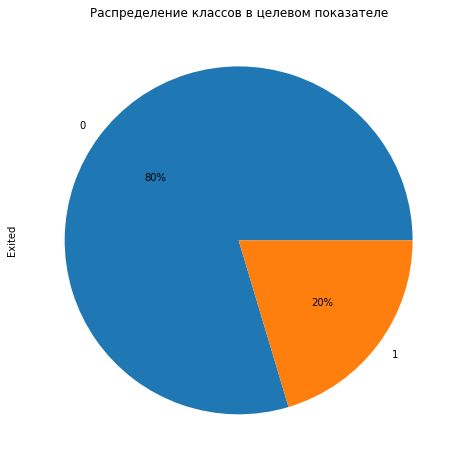

In [31]:
data['Exited'].value_counts().plot.pie(subplots=True, figsize=(15,8), autopct='%1.0f%%', legend=False)
plt.title('Распределение классов в целевом показателе');

In [32]:
A = (data['Exited'] == 0).sum()/(data['Exited'] == 1).sum()

In [33]:
B = 1 / A

При просмотре данных целевого показателя, можно заметить, что значения `0` встречаются в 4 раза чаще, чем значения `1`. Из этого можно сделать вывод, что в данных есть дисбаланс. Обучим модели и посмотрим на результаты метрик при дисбалансе данных. 

Для дальнейших действий нам понадобятся параметры `A` - repeat и `B` - fraction.

Для более удобного просмотра данных в конце проекта создадим таблицу. Данные из каждой модели будем записывать в словать `dict`.

In [34]:
dict = {}

### Модель решающее дерево

Первая модель, которую мы будем исследовать, это решающее дерево. Обучим модель без учёта дисбаланса, посмотрим на матрицу ошибок, на метрику `F1`, а также на метрику `AUC-ROC`.

Во-первых, подберем параметры максимальной глубины решающего дерева.

In [35]:
best_model = None
best_result = 0
for depth in range (1, 16, 1):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth)
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        
best_model

DecisionTreeClassifier(max_depth=9, random_state=12345)

Во-вторых обучим модель с наилучшими подобранными гиперпараметрами.

In [36]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = 9)
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['DTC db'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5754985754985754
AUC-ROC: 0.7916329272261475
Confusion matrix:
[[1500   93]
 [ 205  202]]


После подбора гиперпараметров и обучения модели, из данного анализа можно сделать вывод:
- модель решающего дерева после обучения имеет метрику `F1` равную всего лишь `0.57`;
- `AUC-ROC` равна `0.79`;
- матрица ошибок показывает нам, что модель имеет дисбаланс классов. Истино отрицательных ответов в несколько раз больше чем остальных. Ложноотрицательных ответов также в 2 раза больше, чем ложноположительных.

### Модель случайный лес

Вторая модель, которую мы будем исследовать, это случайный лес. Мы также обучим модель без учёта дисбаланса классов, посмотрим на матрицу ошибок, на метрику `F1`, а также на метрику `AUC-ROC` .

Во-первых, также подберем наилучшие гиперпараметры для модели случайного леса.

In [37]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 60, 10):
    for depth in range (1, 20, 1):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

best_model

RandomForestClassifier(max_depth=19, n_estimators=50, random_state=12345)

Во-вторых, обучим модель с наилучшими гиперпараметрами и посмотрим на результаты метрик.

In [38]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=50, max_depth=19)
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['RFC db'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5864661654135339
AUC-ROC: 0.8496855869737225
Confusion matrix:
[[1530   63]
 [ 212  195]]


Из данного анализа можно сделать вывод, что:

- модель случайного леса после обучения имеет метрику `F1` чуть выше, чем модель решающего дерева `0.586`;
- `AUC-ROC` равна `0.85`, что лучше, чем в моделе решающего дерева;
- матрица ошибок также показывает нам, что истино отрицательных ответов в несколько раз больше чем истинно положительных. Ложноотрицательных ответов в 3 раза больше чем ложноположительных.

### Модель логистической регрессии

Третья модель, которую мы будем исследовать, это случайный лес. Мы также обучим модель, посмотрим на матрицу ошибок, на метрику `F1`, а также на метрику `AUC-ROC`.

In [39]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000)
model.fit(features_train_scaled , target_train)
predicted_valid = model.predict(features_valid_scaled)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['LG db'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.47419354838709676
AUC-ROC: 0.8464566261176429
Confusion matrix:
[[1527   66]
 [ 260  147]]


Из данного анализа можно сделать вывод, что:
- модель логистической регрессии после обучения имеет самую худшую метрику `F1` равную `0.47`;
- `AUC-ROC` равна `0.84`;
- матрица ошибок также показывает нам, что баланса классов нет. Истино отрицательных ответов в несколько раз больше чем остальных. Ложноотрицательные ответы также в несколько раз больше, чем оставшиеся.

## Борьба с дисбалансом

Для улучшения качества модели необходимо улучшить баланс классов. Для начала воспользуемся аргументом `class_weight`. Сравним результаты моделей.

Начнем с моделей решающего дерева.

### Решающее дерево

#### Взвешивание классов

Для начала подберем лучшие параметры для модели, которая будет использовать для баланса метод взвешивания классов. Придадим объектам редкого класса больший вес.

In [40]:
best_model = None
best_result = 0
for depth in range (1, 20, 1):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth, class_weight='balanced')
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        
best_model

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=12345)

Видим, что глубина решающего дерева при балансе классов методом вщвешивания равна 3. Обучим модель с наилучшими гиперпараметрами и посмотрим на результаты метрик.

In [41]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = 3, class_weight='balanced')
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['DTC b_1'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5659287776708374
AUC-ROC: 0.8163942062247147
Confusion matrix:
[[1255  338]
 [ 113  294]]


После обучения можно сделать вывод:
- модель решающего дерева после обучения имеет метрику `F1` незначительно, но меньше, чем без взвешивания классов и равную 0.566;
- `AUC-ROC` равна `0.81`, немного увеличилось;
- матрица ошибок немного изменилась. Истино отрицательных ответов стало меньше, прибавилось истинно полоэительных ответов, но ложноположительных также прибавилось в несколько раз, ложно отрицательных ответов стало меньше.

#### Увеличение выборки

Следующим методом балансирования классов будет увеличение выборки.

Следует написать функцию для увеличения выборки.

In [42]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Получим сбалансированные данные.

In [43]:
features_upsampled, target_upsampled = upsample(features_train, target_train, round(A))

Найдем лучшие гиперпараметры.

In [44]:
best_model = None
best_result = 0
for depth in range (1, 20, 1):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth)
    model.fit(features_upsampled, target_upsampled) 
    predicted_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        
best_model

DecisionTreeClassifier(max_depth=3, random_state=12345)

Обучаем модель с подходящими гиперпараметрами и смотрим, какие показатели будут у метрик.

In [45]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = 3)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['DTC b_2'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5659287776708374
AUC-ROC: 0.8163942062247147
Confusion matrix:
[[1255  338]
 [ 113  294]]


После увеличения выборки, данные также улучшились:
- модель решающего дерева после обучения имеет метрику `F1` равную `0.56`;
- `AUC-ROC` равна `0.81`.
- как и в предыдущем методе матрица ошибок имеет такое же распределение.

#### Уменьшение выборки

Слудющий метод баланса классов уменьшение выборки. Напишем функцию для уменьшения выборки.

In [46]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

Найдем значения уменьшенной выборки с параметром `frac` равным `B`.

In [47]:
features_downsampled, target_downsampled = downsample(features_train, target_train, B)

Найдем наилучшие гиперпарамтеры для модели решающего дерева.

In [48]:
best_model = None
best_result = 0
for depth in range (1, 20, 1):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = depth)
    model.fit(features_downsampled, target_downsampled) 
    predicted_valid = model.predict(features_valid) 
    result = f1_score(target_valid, predicted_valid)
    if result > best_result:
        best_model = model
        best_result = result
        
best_model

DecisionTreeClassifier(max_depth=6, random_state=12345)

In [49]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = 6)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid) 

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['DTC b_3'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5943304007820137
AUC-ROC: 0.8375725494369562
Confusion matrix:
[[1281  312]
 [ 103  304]]


После уменьшения выборки можно сделать вывод, что:
- метрика `F1` увеличилась до `0,59`;
- метрика `AUC-ROC` также улучшилась до `0,83`;
- матрица ошибок имеет такое же распределение, как и раньше.

Данная модель с применением метода уменьшения выборки показала лучший результат среди предыдущих методов.

### Случайный лес

#### Взвешивание классов

Первый метод, который мы применим к модели случайного леса будет взвешивание классов. Для начала подберем лучшие параметры для модели, в которой будем использовать метод взвешивания классов. Придадим объектам редкого класса больший вес.

In [50]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 70, 10):
    for depth in range (1, 11, 1):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth,
                                       class_weight='balanced')
        model.fit(features_train, target_train) 
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

best_model

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=12345)

После найденых наилучших гиперпараметров, обучим модель. Посмотрим на результаты метрик.

In [51]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=50, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['RFC b_1'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.6380510440835268
AUC-ROC: 0.8638962537267623
Confusion matrix:
[[1413  180]
 [ 132  275]]


После увеличение веса одного класса модель улучшила свои метрики. Можно сделать вывод, что:
- метрика F1 увеличилась и стала 0,638;
- метрика AUC-ROC также увеличилась до 0,863;
- матрица ошибок изменилась, но не значительно. Истинно отрицательных показателей стало меньше, соответсвенно прибавилось истинно положительных ответов, а также ложноположительных.

#### Увеличение выборки

Второй метод для модели случайного леса будет увеличение выборки. Найдем лучшие гиперпараметры с данными, в которых увеличена выборка.

In [52]:
features_upsampled, target_upsampled = upsample(features_train, target_train, round(A))

In [53]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 130, 10):
    for depth in range (1, 12, 1):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled) 
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

best_model

RandomForestClassifier(max_depth=11, n_estimators=120, random_state=12345)

Обучим модель с данными гиперпараметрами и посмотрим на метрики.

In [54]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=120, max_depth=11)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['RFC b_2'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.6312292358803987
AUC-ROC: 0.8628551509907442
Confusion matrix:
[[1382  211]
 [ 122  285]]


После увеличение выборки можно сделать вывод, что:
- метрика `F1` увеличилась до 0.631, но стала меньше чем при методе всзвешивания классов;
- метрика `AUC-ROC` 0.862 повела себя также, как и `F1`;
- матрица ошибок имеет такое же распределение, как и при методе взвешивания классов.

#### Уменьшение выборки

Следующий метод, который мы применим к модели случайного леса будет уменьшение выборки. Подберем гиперпараметры для уменьшенной выборки.

In [55]:
features_downsampled, target_downsampled = downsample(features_train, target_train, B)

In [56]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 110, 10):
    for depth in range (1, 9, 1):
        model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled) 
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
            
print(best_model)
print('n_estimators =', best_est)

RandomForestClassifier(max_depth=8, random_state=12345)
n_estimators = 100


Обучим модель на этих гиперпараметрах и посмотрим на метрики.

In [57]:
model = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100, max_depth=8)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['RFC b_3'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.6223506743737958
AUC-ROC: 0.8731196527806697
Confusion matrix:
[[1285  308]
 [  84  323]]


При обучении модели с данными уменьшенной выборки:
- модель показывает метрику `F1` хуже, чем в случае с увеличенной выборкой и чем при параметре `class_weight`, но относительно модели, где не учитывается дисбаланс классов она выглядит лучше и показывает `0,622`;
- метрика `AUC_ROC` относительно всех предыдущих моеделей показала лучший результат и увеличилась до `0,87`;
- матрица ошибок немного изменилась, истинно отрицательных ответов стало меньше, истинно положительных ответов стало больше, как и ложноположительных. Ложноотрицательных ответов стало в несколько раз меньше, чем ложноположительных.

### Логистическая регрессия

#### Взвешивание классов

Перейдем к моделе логистической регрессии. Первым делом проверим модель логистической регрессии с параметром `class_weight`, используя метод взвешивания классов.

In [58]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear',
                           max_iter=1000, class_weight='balanced')
model.fit(features_train_scaled , target_train)
predicted_valid = model.predict(features_valid_scaled)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['LG b_1'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.578853046594982
AUC-ROC: 0.8487701877532384
Confusion matrix:
[[1207  386]
 [  84  323]]


Из данного анализа можно сделать вывод, что:
- модель логистической регрессии после обучения имеет по-прежнему самую худшую метрику `F1`, равную `0.578`, хотя она значительно увеличилась по сравнению с моделью, которая не учитывает дисбаланс классов;
- `AUC-ROC` равна `0.84`;
- матрица ошибок изсенилась, количество истинно отрицательных ответов уменьшилось, как и ложноотрицательных, а вот истинно положительных и ложноположительных ответов прибавилось.

#### Увеличение выборки

Применим метод увеличения выборки для логистической регрессии. Обучим модель с данными, в которых увеличена выборка. Получим сбалансированные масштабированные данные.

In [59]:
features_train_scaled = pd.DataFrame(scaler.transform(features_train), index=features_train.index) 

In [60]:
features_upsampled, target_upsampled = upsample(features_train_scaled, target_train, round(A))

In [61]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000)
model.fit(features_upsampled, target_upsampled) 
predicted_valid = model.predict(features_valid_scaled)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['LG b_2'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5752448797862868
AUC-ROC: 0.8488118318626794
Confusion matrix:
[[1200  393]
 [  84  323]]


После анализа можно сделать вывод, что:
- метрика `F1` уменьшилась по сравнению с моделью, в которой используется метод взвешивания классов, но незначительно, `0.575`;
- метрика `AUC-ROC` практически не изменилась;
-матрица ошибок представляет из себя такое же распределение, как и в предыдущей моделе.

#### Уменьшение выборки

Следующим методом, который мы применим к моделе логистической регрессии будет уменьшение выборки. Получим уменьшенную выборку для масштабированных данных.

In [62]:
features_downsampled, target_downsampled = downsample(features_train_scaled, target_train, B)

In [63]:
model = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000)
model.fit(features_downsampled, target_downsampled) 
predicted_valid = model.predict(features_valid_scaled)

print("F1:", f1_score(target_valid, predicted_valid))

probabilities_valid = model.predict_proba(features_valid_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC:', auc_roc)


print('Confusion matrix:')
print(confusion_matrix(target_valid, predicted_valid))

dict['LG b_3'] = [f1_score(target_valid, predicted_valid), auc_roc]

F1: 0.5797101449275361
AUC-ROC: 0.8485141535988994
Confusion matrix:
[[1216  377]
 [  87  320]]


В моделе линейной регрессии с использованием метода уменьшения выборки, можно сделать выводы, что:
- уменьшение выборки улучшило `F1`, но незначительно, `до 0.579`;
- `AUC-ROC` незначительно уменьшилось до `0.8485`;
- матрица ошибок имеет распределение такое же, как и в преыдущих моделях.

Для удобного сравнения показателей, которые были выявлены выше, создадим таблицу, где поочереди идут показатели разных моделей.

In [64]:
pd.DataFrame(dict, index=['F1','AUC-ROC'])

,DTC db,RFC db,LG db,DTC b_1,DTC b_2,DTC b_3,RFC b_1,RFC b_2,RFC b_3,LG b_1,LG b_2,LG b_3
F1,0.575499,0.586466,0.474194,0.565929,0.565929,0.594330,0.638051,0.631229,0.622351,0.578853,0.575245,0.579710
AUC-ROC,0.791633,0.849686,0.846457,0.816394,0.816394,0.837573,0.863896,0.862855,0.873120,0.848770,0.848812,0.848514


Можно заметить, что лучшие показатели на метрике `F1` показала модель случайного леса, также как и лучшие показатели на метрике `AUC_ROC`. Лучше всего показали себя модели в которых использовался метод взвешивания классов и увеличение выборки. Также стоит отметить, что метрика `AUC-ROC` оказалась лучше у модели случайного леса, в которой использовался метод уменьшения выборки.

# Тестирование модели

Для тестирования была выбрана модель, которая лучше всего показала себя на валидационной выборке, показав метрику `F1` равную `0,638`. Модель случайного леса, обученная на данных с использованием метода взвешивания классов.

In [65]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_test)

print('F1:', f1_score(target_test, predicted_valid))

probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

F1: 0.6258823529411764
AUC-ROC: 0.8568784500987889


После проведения тестирования на тестовой выборке можно сделать вывод, что:
- метрика `F1` показалa результат `0.625`;
- метрика `AUC-ROC` получила результат равный `0.856`.

## Вывод

Проанализировав данные, можно сделать несколько выводов. Например после применения параметра `class_weight`:
- все модели улучшили метрику `F1`, кроме модели решающего дерева, где данная метрика снизилась но незначительно;
- также как и все модели улучшили метрику `AUC-ROC`.

После применения увеличения выборки, можно сделать вывод, что:
- модель решающего дерева показала результат такой же как и при использовании метода `class_weight` относительно метрик `F1` и `AUC-ROC`;
- все остальные модели улучшили метрику `F1`, по сравнению с моделями, у которых не было баланса классов;
- модель логистической регрессии показала метрику `F1` незначительно хуже, чем при использовании метода взвешивания классов, но метрика `AUC-ROC` незначительно увеличилась;
- в моделе случайного леса метрика `F1` и метрика `AUC-ROC` по сравнению с методом взвешивания классов незначительно уменьшились.

После применения уменьшения выборки, можно сделать следующие выводы:

- модель решающего дерева улучшила все свои метрики и показала лучший результат при использовании метода уменьшения выборки;
- модель случайного дерева показала метрику `F1` меньше, чем при двух другимх методах, но зато улучшила метрику `AUC-ROC`;
- модель логистической регрессии улучишла метрику `F1`, но `AUC-ROC` снизилась, но совсем незначительно.

Можно сделать вывод, что большинство моделей показали лучшую метрику `F1` при применении метода уменьшения выборки. Но все-таки лучшая модель была выбрана, исходя из максимального значения `F1` на валидационной выборке. Это модель случайного леса с использованием метода взвешивания классов, имеющая гиперпараметры `max_depth = 10` и `n_estimators = 50`.